# Data Scientist (Client2) – request analyses on Twin data

This notebook pulls the Twin from Client1, runs analysis steps (matching `Basic_analysis_SC.ipynb`) on the public side, and requests private execution from the owner at each step.

## Setup

In [1]:
# !uv pip install scanpy annadata matplotlib scikit-misc

In [2]:
import sys
from pathlib import Path

sys.path.insert(0, "../../python/src")
import beaver
from beaver import Twin

bv = beaver.connect("shared", user="client2")

🔄 Auto-load replies enabled for client2 (polling every 2.0s)


In [6]:
!uv pip install scanpy anndata matplotlib scikit-misc

Resolved 41 packages in 7ms                                          
Installed 32 packages in 150ms                              
 + anndata==0.12.6
 + array-api-compat==1.12.0
 + contourpy==1.3.3
 + cycler==0.12.1
 + donfig==0.8.1.post1
 + fonttools==4.60.1
 + google-crc32c==1.7.1
 + h5py==3.15.1
 + joblib==1.5.2
 + kiwisolver==1.4.9
 + legacy-api-wrap==1.5
 + llvmlite==0.45.1
 + matplotlib==3.10.7
 + natsort==8.4.0
 + networkx==3.6
 + numba==0.62.1
 + numcodecs==0.16.5
 + patsy==1.0.2
 + pillow==12.0.0
 + pynndescent==0.5.13
 + pyparsing==3.2.5
 + scanpy==1.11.5
 + scikit-learn==1.7.2
 + scikit-misc==0.5.2
 + scipy==1.16.3
 + seaborn==0.13.2
 + session-info2==0.2.3
 + statsmodels==0.14.5
 + threadpoolctl==3.6.0
 + tqdm==4.67.1
 + umap-learn==0.5.9.post2
 + zarr==3.1.5


In [3]:
# import numpy as np
# import pandas as pd
# import scanpy as sc
# import matplotlib.pyplot as plt

In [4]:
# !uv pip install scanpy

In [8]:
import scanpy as sc

## Load Twin from inbox

In [9]:
bv.peer("client1").remote_vars

Name,Type,ID
patient_sc,"Twin[AnnData] (30000, 36601)",52af8ce35e51...


In [10]:
bv.peer("client1").remote_vars["patient_sc"].load(auto_accept=True)

✓ Loaded Twin 'patient_sc' from published location


🌍 Twin: patient_sc (MOCK DATA - SAFE)
  🔒 Private    (not available) 💡 .request_private()
  🌍 Public    <AnnData (preview): AnnData n_obs=30000, n_vars=36601 — r...    ← .value uses this
  Owner: client1
  Live: ⚫ Disabled
  IDs: twin=b8463281... private=2bf35177... public=f6d11483...

In [11]:
patient_sc

🌍 Twin: patient_sc (MOCK DATA - SAFE)
  🔒 Private    (not available) 💡 .request_private()
  🌍 Public    <AnnData (preview): AnnData n_obs=30000, n_vars=36601 — r...    ← .value uses this
  Owner: client1
  Live: ⚫ Disabled
  IDs: twin=b8463281... private=2bf35177... public=f6d11483...

## Step 1: Violin Plot

In [12]:
@bv
def make_violin(adata):
    n_cells = adata.n_obs
    print("stdout", "n_cells", adata.n_obs)
    import sys
    sys.stdout.write("Another stdout line\n")
    sys.stderr.write("Another stderr line\n")

    # A way to visualise quality metrics of the matrices
    import matplotlib.pyplot as plt
    sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], size=0, multi_panel=True)
    fig = plt.gcf()  # get current figure
    return fig

In [13]:
z = make_violin(patient_sc)

In [14]:
z.public_stdout

'stdout n_cells 30000\nAnother stdout line\n'

In [15]:
result = make_violin(patient_sc)

In [16]:
result.public_stderr

'Another stderr line\n'

In [17]:
result.public_stdout

'stdout n_cells 30000\nAnother stdout line\n'

In [18]:
result.public

<Figure size 1511.11x500 with 3 Axes>

In [19]:
result.request_private()

📨 Sending computation request to client1
   Function: make_violin
   Result: result
✓ Sent to shared/client1/83adf818b84c42e68da4466b4782a977.beaver
💡 Result will auto-update when client1 approves


In [20]:
result

⚠️  Twin: make_violin_result (REAL + MOCK DATA)
  ⚠️  Be careful: This Twin contains both real and mock data
  🔒 Private    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━...    ← .value uses this
  🌍 Public    <Figure size 1511.11x500 with 3 Axes>    ✓
  Live: ⚫ Disabled
  📤 Captured stdout: 41 chars
  ⚠️  Captured stderr: 20 chars
  📊 Captured figures: 2
  IDs: twin=607ce651... private=3c0aac34... public=e3cbaade...
  💡 Access: .public_stdout, .public_stderr, .public_figures

In [21]:
bv.wait_for_message()

✨ Twin result auto-updated: make_violin_result...
   .private now contains the approved result
   .public still has your local mock data
📬 New message: make_violin_result
   From: client1


(BeaverEnvelope [DATA]: make_violin_result
   From: client1
   Type: Twin (beaver.twin)
   Size: 173828 bytes
   Created: 2025-11-25 05:11:07 UTC
   ID: fb462ca0...
   Reply to: 099794ef...
 
 Preview:
   🔒 Twin: make_violin_result (REAL DATA - SENSITIVE)
   🔒 Private    {'_beaver_figure': True, 'png_bytes': b'\x89PNG\r\n\x1a\n...    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=e481aa66... private=bc67bc22... public=87780d7d...,
 🔒 Twin: make_violin_result (REAL DATA - SENSITIVE)
   🔒 Private    <CapturedFigure png=57797 bytes, figure=no>    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=e481aa66... private=bc67bc22... public=87780d7d...)

In [22]:
result

⚠️  Twin: make_violin_result (REAL + MOCK DATA)
  ⚠️  Be careful: This Twin contains both real and mock data
  🔒 Private    <CapturedFigure png=57797 bytes, figure=no>    ← .value uses this
  🌍 Public    <Figure size 1511.11x500 with 3 Axes>    ✓
  Live: ⚫ Disabled
  📤 Captured stdout: 41 chars
  ⚠️  Captured stderr: 20 chars
  📊 Captured figures: 2
  IDs: twin=607ce651... private=3c0aac34... public=e3cbaade...
  💡 Access: .public_stdout, .public_stderr, .public_figures

In [23]:
result.public

<Figure size 1511.11x500 with 3 Axes>

In [24]:
result.public_stderr

'Another stderr line\n'

In [25]:
result.public_stdout

'stdout n_cells 30000\nAnother stdout line\n'

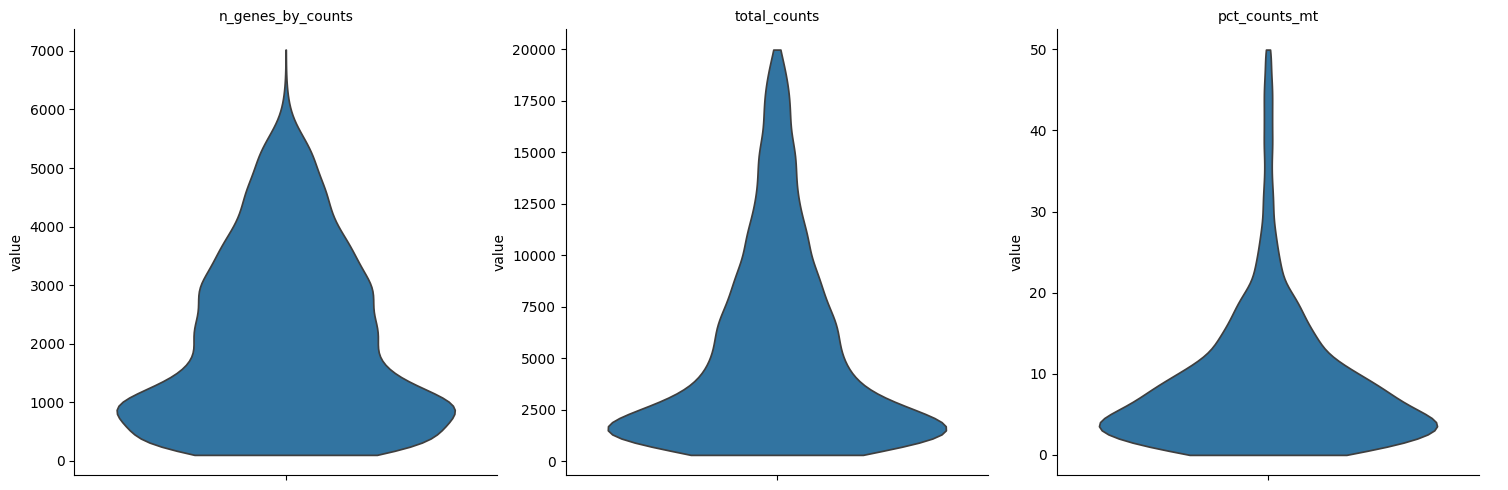

In [26]:
result.private

In [27]:
result.private_stderr

'Another stderr line\n'

In [28]:
result.private_stdout

'stdout n_cells 7876\nAnother stdout line\n'

# Step 2 Embeding

In [29]:
patient_sc

🌍 Twin: patient_sc (MOCK DATA - SAFE)
  🔒 Private    (not available) 💡 .request_private()
  🌍 Public    <AnnData (preview): AnnData n_obs=30000, n_vars=36601 — r...    ← .value uses this
  Owner: client1
  Live: ⚫ Disabled
  IDs: twin=b8463281... private=2bf35177... public=f6d11483...

In [30]:
@bv
def show_embedding(adata):
    n_cells = adata.n_obs
    print("stdout", "n_cells", adata.n_obs)
    import sys
    sys.stdout.write("Another stdout line\n")
    sys.stderr.write("Another stderr line\n")

    fig = sc.pl.embedding(
        patient_sc.public,
        basis='X_umap',
        color=['pct_counts_mt','cell_type'],
        ncols=1,size=15,
        frameon=False, 
        show=False
    )
    return fig

In [31]:
embedding_plot = show_embedding(patient_sc)

In [32]:
embedding_plot

⚠️  Twin: show_embedding_result (REAL + MOCK DATA)
  ⚠️  Be careful: This Twin contains both real and mock data
  🔒 Private    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━...    ← .value uses this
  🌍 Public    [<Axes: title={'center': 'pct_counts_mt'}, xlabel='X_umap...    ✓
  Live: ⚫ Disabled
  📤 Captured stdout: 41 chars
  ⚠️  Captured stderr: 20 chars
  📊 Captured figures: 1
  IDs: twin=68a45c7e... private=4f055e82... public=f35404ec...
  💡 Access: .public_stdout, .public_stderr, .public_figures

In [33]:
# %matplotlib inline

In [34]:
# from IPython import get_ipython

# ip = get_ipython()
# if ip is not None:
#     ip.run_line_magic("matplotlib", "inline")

In [35]:
embedding_plot.public[0]

<Axes: title={'center': 'pct_counts_mt'}, xlabel='X_umap1', ylabel='X_umap2'>

In [36]:
embedding_plot.request_private()

📨 Sending computation request to client1
   Function: show_embedding
   Result: embedding_plot
✓ Sent to shared/client1/4c897075d45a42ea918082aadd64e65e.beaver
💡 Result will auto-update when client1 approves


In [37]:
bv.wait_for_message()

📬 New message: show_embedding_result
   From: client1


(BeaverEnvelope [DATA]: show_embedding_result
   From: client1
   Type: Twin (beaver.twin)
   Size: 305346 bytes
   Created: 2025-11-25 05:11:11 UTC
   ID: 9c2b5a5a...
   Reply to: 9a31fab0...
 
 Preview:
   🔒 Twin: show_embedding_result (REAL DATA - SENSITIVE)
   🔒 Private    [{'_beaver_figure': True, 'png_bytes': b'\x89PNG\r\n\x1a\...    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=b2c8e05a... private=f8c8c1dd... public=8c1e7749...,
 🔒 Twin: show_embedding_result (REAL DATA - SENSITIVE)
   🔒 Private    [<CapturedFigure png=101634 bytes, figure=no>, <CapturedF...    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=b2c8e05a... private=f8c8c1dd... public=8c1e7749...)

# Step 3: PCA Variance

In [38]:
embedding_plot

⚠️  Twin: show_embedding_result (REAL + MOCK DATA)
  ⚠️  Be careful: This Twin contains both real and mock data
  🔒 Private    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━...    ← .value uses this
  🌍 Public    [<Axes: title={'center': 'pct_counts_mt'}, xlabel='X_umap...    ✓
  Live: ⚫ Disabled
  📤 Captured stdout: 41 chars
  ⚠️  Captured stderr: 20 chars
  📊 Captured figures: 1
  IDs: twin=68a45c7e... private=4f055e82... public=f35404ec...
  💡 Access: .public_stdout, .public_stderr, .public_figures

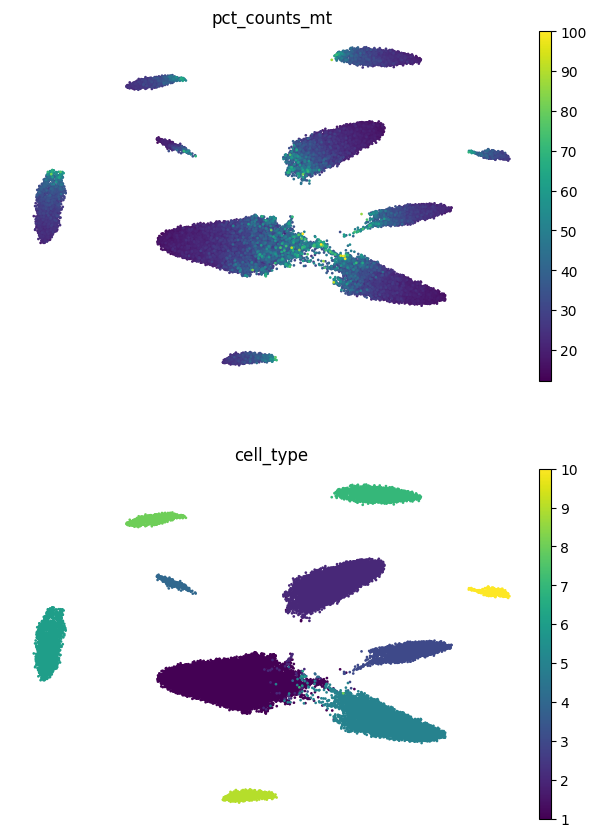

In [43]:
embedding_plot.private_figures[0]

In [41]:
import matplotlib.pyplot as plt

In [44]:
@bv
def plot_pca_variance(adata):
    adata.layers['raw_counts'] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='seurat_v3', layer='raw_counts', n_top_genes=5000)
    sc.pp.pca(adata, use_highly_variable=True)
    with plt.rc_context({'figure.figsize':(4,3)}):
        sc.pl.pca_variance_ratio(adata, n_pcs=50)

In [45]:
pca_variance = plot_pca_variance(patient_sc)

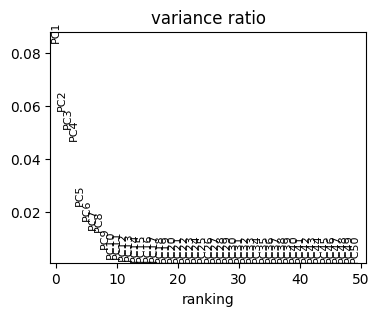

In [46]:
pca_variance.public_figures[0]

In [47]:
pca_variance.request_private()

📨 Sending computation request to client1
   Function: plot_pca_variance
   Result: pca_variance
✓ Sent to shared/client1/0128d86b72ea4fdea734528e9b750a48.beaver
💡 Result will auto-update when client1 approves


In [48]:
bv.wait_for_message()

✨ Twin result auto-updated: plot_pca_variance_result...
   .private now contains the approved result
   .public still has your local mock data
📬 New message: plot_pca_variance_result
   From: client1


(BeaverEnvelope [DATA]: plot_pca_variance_result
   From: client1
   Type: Twin (beaver.twin)
   Size: 34244 bytes
   Created: 2025-11-25 05:12:23 UTC
   ID: 5c15ce37...
   Reply to: ec57f454...
 
 Preview:
   🔒 Twin: plot_pca_variance_result (REAL DATA - SENSITIVE)
   🔒 Private    {'_none_result': True, 'has_figures': True}    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=4494142c... private=73890080... public=5a9b5d91...,
 🔒 Twin: plot_pca_variance_result (REAL DATA - SENSITIVE)
   🔒 Private    {'_none_result': True, 'has_figures': True}    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=4494142c... private=73890080... public=5a9b5d91...)

In [49]:
pca_variance

⚠️  Twin: plot_pca_variance_result (REAL + MOCK DATA)
  ⚠️  Be careful: This Twin contains both real and mock data
  🔒 Private    {'_none_result': True, 'has_figures': True}    ← .value uses this
  🌍 Public    {'_none_result': True, 'has_figures': True}    ✓
  Live: ⚫ Disabled
  ⚠️  Captured stderr: 698 chars
  📊 Captured figures: 2
  IDs: twin=c071955f... private=2a5ea5de... public=5c36a645...
  💡 Access: .public_stdout, .public_stderr, .public_figures

In [50]:
pca_variance.private

{'_none_result': True, 'has_figures': True}

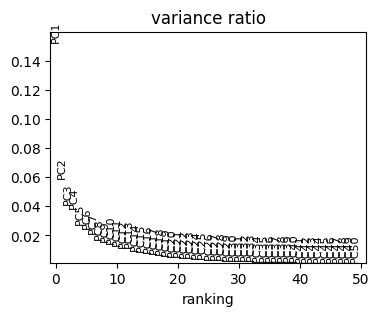

In [51]:
pca_variance.private_figures[0]

# Step 4: umap embeddings

In [52]:
@bv
def umap_embedding(adata):
    sc.pp.neighbors(adata, n_pcs=50)
    sc.tl.umap(adata)
    return sc.pl.embedding(
        adata,
        basis='X_umap',
        color=['cell_type'],
        ncols=1,size=15,
        frameon=False, 
        show=True
    )

In [53]:
umap_embeddings = umap_embedding(patient_sc)

In [54]:
umap_embeddings.public

{'_none_result': True, 'has_figures': True}

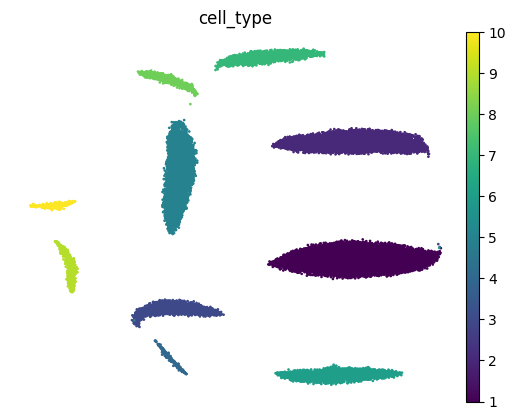

In [55]:
umap_embeddings.public_figures[0]

In [56]:
umap_embeddings.request_private()

📨 Sending computation request to client1
   Function: umap_embedding
   Result: umap_embeddings
✓ Sent to shared/client1/dffb0f643ba64a5f81562ac13cbf68d9.beaver
💡 Result will auto-update when client1 approves


In [57]:
bv.wait_for_message()

📬 New message: umap_embedding_result
   From: client1


(BeaverEnvelope [DATA]: umap_embedding_result
   From: client1
   Type: Twin (beaver.twin)
   Size: 138730 bytes
   Created: 2025-11-25 05:13:53 UTC
   ID: e48bdf0f...
   Reply to: 2673586a...
 
 Preview:
   🔒 Twin: umap_embedding_result (REAL DATA - SENSITIVE)
   🔒 Private    {'_none_result': True, 'has_figures': True}    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=9616284d... private=0bafe2af... public=a228a79f...,
 🔒 Twin: umap_embedding_result (REAL DATA - SENSITIVE)
   🔒 Private    {'_none_result': True, 'has_figures': True}    ← .value uses this
   🌍 Public    (not set)
   Live: ⚫ Disabled
   IDs: twin=9616284d... private=0bafe2af... public=a228a79f...)

In [58]:
bv.inbox()

name,id,sender,type,size_bytes,created_at,reply_to
make_violin_result,fb462ca088ca...,client1,Twin,173828,2025-11-25 05:11:07,099794efa09a...
show_embedding_result,9c2b5a5a49e0...,client1,Twin,305346,2025-11-25 05:11:11,9a31fab0e0d5...
plot_pca_variance_result,5c15ce37f967...,client1,Twin,34244,2025-11-25 05:12:23,ec57f4547f29...
umap_embedding_result,e48bdf0f4d37...,client1,Twin,138730,2025-11-25 05:13:53,2673586a0827...


In [59]:
# bv.inbox()[3].load()

In [60]:
umap_embeddings

⚠️  Twin: umap_embedding_result (REAL + MOCK DATA)
  ⚠️  Be careful: This Twin contains both real and mock data
  🔒 Private    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━...    ← .value uses this
  🌍 Public    {'_none_result': True, 'has_figures': True}    ✓
  Live: ⚫ Disabled
  📊 Captured figures: 2
  IDs: twin=4f7441c6... private=d9a9890c... public=68dc8104...
  💡 Access: .public_stdout, .public_stderr, .public_figures

In [61]:
umap_embeddings.private_figures[0]

TypeError: 'NoneType' object is not subscriptable

✨ Twin result auto-updated: umap_embedding_result...
   .private now contains the approved result
   .public still has your local mock data
